<a href="https://colab.research.google.com/github/sumayabai/Book-Recommendation-System/blob/main/Copy_of_Copy_of_Book_Recomendation_System(Final)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#loading the users data
users_df = pd.read_csv('/content/drive/My Drive/Capstone 4/Users.csv')

In [ ]:
#loading the Books data
books_df = pd.read_csv('/content/drive/My Drive/Capstone 4/Books.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#loading the ratings data
ratings_df = pd.read_csv('/content/drive/My Drive/Capstone 4/Ratings.csv')

# Data Preprocessing and EDA of Users dataset

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df.shape

(278858, 3)

In [ ]:
users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [ ]:
users_df['User-ID'].values

array([     1,      2,      3, ..., 278856, 278857, 278858])

In [ ]:
users_df['Age'].values

array([nan, 18., nan, ..., nan, nan, nan])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


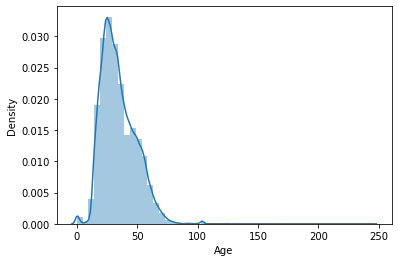

In [ ]:
#plot the age value to have a better understanding of the outlier
sns.distplot(users_df.Age)

From the above plot, we can understand that there are outliers in the age column, as age below 5 and above 90 are really not important for our case, they can be replaced by nans.

In [ ]:
users_df.loc[(users_df.Age > 90) | (users_df.Age < 5), 'Age'] = np.nan

In [ ]:
#replacing nans with the mean
users_df.Age = users_df.Age.fillna(users_df.Age.mean())

In [ ]:
#replacing the type of age column as integer
users_df.Age = users_df.Age.astype(np.int32)

In [ ]:
print(sorted(users_df.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
users_df['Location'].values

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'brampton, ontario, canada', 'knoxville, tennessee, usa',
       'dublin, n/a, ireland'], dtype=object)

In [ ]:
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
#change country dtype as string
users_df['Country']=users_df['Country'].astype('str')

In [ ]:
#check the values in country column

a=list(users_df.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [ ]:
#so many missplelling, need to correct it 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Top 10 countries')

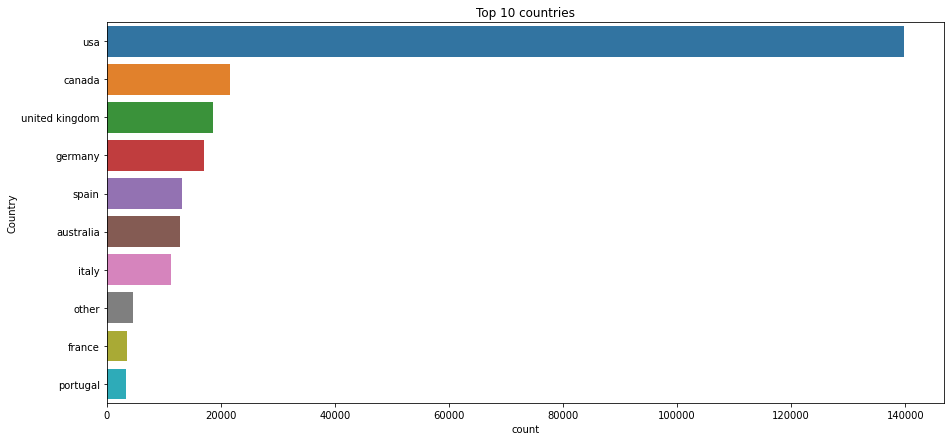

In [ ]:
#plot the top 10 countries who has max number of users
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users_df,order=pd.value_counts(users_df['Country']).iloc[:10].index)
plt.title('Top 10 countries')

We can see from the above plot that, USA has the highest number of users.

# Data Preprocessing and EDA of Books dataset

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
books_df.shape

(271360, 8)

In [ ]:
#check the values for YearOfPublication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

It can be seen that there are some wrong entries. "DK publication and Galimard (Publisher's name) are wrongly eneterd. some are entries are string, so have to coovert the dtype as int.

In [ ]:
#check rows with dk publising
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#investigating the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books_df.loc[books_df.ISBN == '2070426769',:]


#rechecking
books_df.loc[books_df.ISBN == '2070426769',:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
#Correcting the dtypes of yearOfPublication
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

In [ ]:

print(sorted(books_df['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
#0 is invalid, so that can be replaced to nan value
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [ ]:
#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [ ]:
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
#exploring the publisher column
books_df.loc[books_df.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [ ]:
#two nan values

#Filling Nan of Publisher with others
books_df.Publisher.fillna('other',inplace=True)

In [ ]:
#exploring 'Book-Author' column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [ ]:
#Filling Nan of Book-Author with others
books_df['Book-Author'].fillna('other',inplace=True)

Text(0.5, 1.0, 'Top 10 Authors')

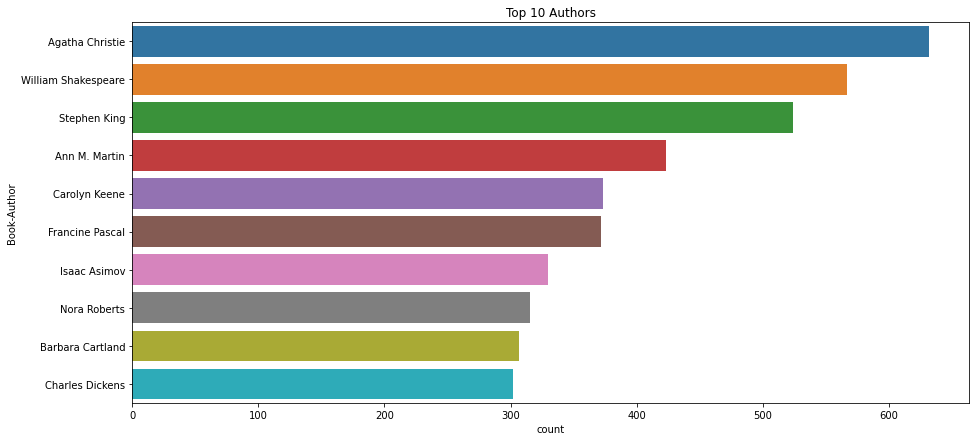

In [ ]:
#plot the top 10 authors
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books_df,order=pd.value_counts(books_df['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

It can be seen from the above plot that 'AGATHA CHRISTIE' is the top most author

Text(0.5, 1.0, 'Top 10 Publishers')

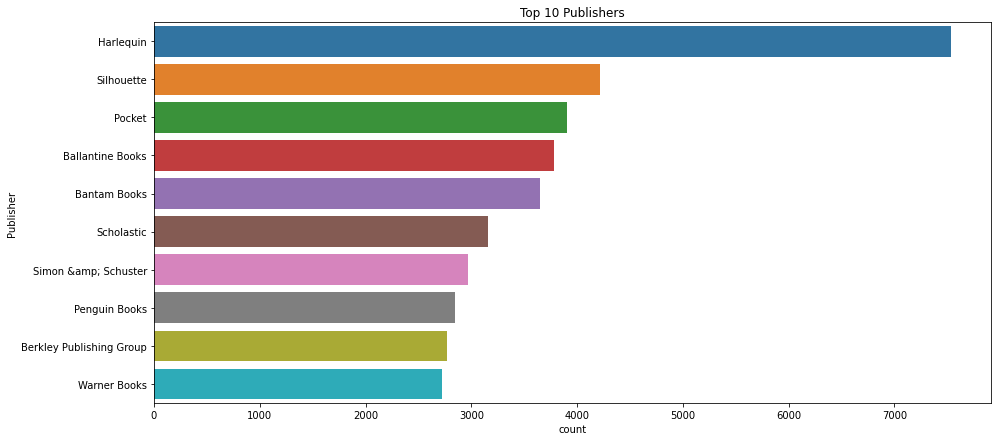

In [ ]:
#plot the top 10 publishers
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

It can be seen from the above plot that 'HARLEQUIN' is the top most publisher


## Data Preprocessing and EDA of Ratings dataset

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#shape 
ratings_df.shape

(1149780, 3)

In [ ]:
ratings_df.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [ ]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_df.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

In [ ]:
ratings_new = ratings_new[ratings_df['User-ID'].isin(users_df['User-ID'])]
ratings_df.shape,ratings_new.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


((1149780, 3), (1031136, 3))

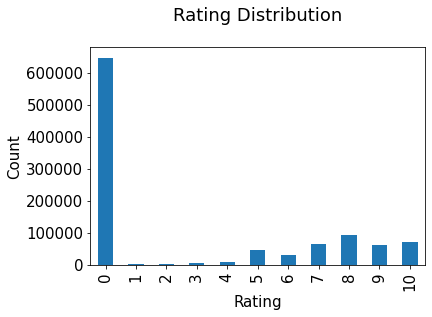

In [ ]:
#ploting the rating distribution

plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
#Segreragating the implict and explicit rating as mentioned in the dataset.
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:

print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


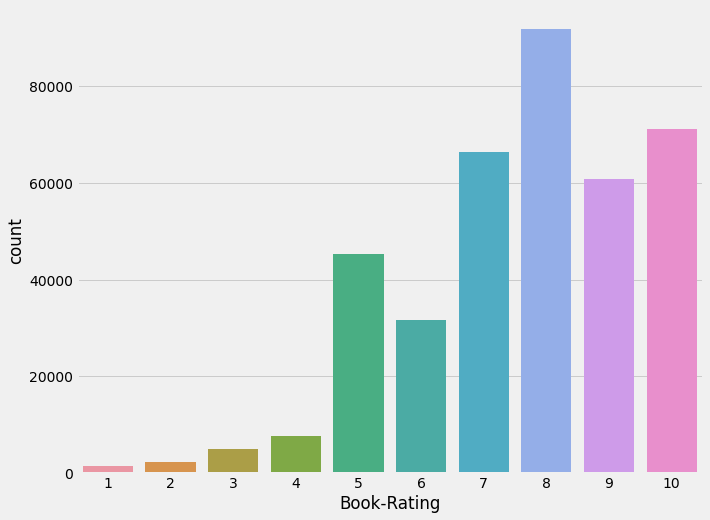

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating')

In [ ]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


In [ ]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


## Null value imputations

In [ ]:
#check for missing values
def missing_zero_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    print(f"Your selected dataframe has "+str(df.shape[1])+" columns and "+str(df.shape[0])+" Rows.\n"
         "There are "+str(mz_table[mz_table.iloc[:,1] != 0].shape[0])+
          " columns that have missing values.")
    return mz_table.reset_index()

In [ ]:
missing_zero_values_table(users_df)

Your selected dataframe has 4 columns and 278858 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Location,0,0.0,object
2,Age,0,0.0,int32
3,Country,0,0.0,object


In [ ]:
missing_zero_values_table(ratings_df)

Your selected dataframe has 3 columns and 1149780 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


In [ ]:
missing_zero_values_table(books_df)

Your selected dataframe has 5 columns and 271360 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,0,0.0,object
3,Year-Of-Publication,0,0.0,float64
4,Publisher,0,0.0,object


Merging the three dataset to get the final dataset

In [ ]:
final_df=users_df.copy()
final_df=pd.merge(final_df,ratings_explicit,on='User-ID')
final_df=pd.merge(final_df,books_df,on='ISBN')

In [ ]:
final_df.head()

,User-ID,Location,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,"timmins, ontario, canada",34,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,"n/a, n/a, n/a",34,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,"toronto, ontario, canada",30,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,"ottawa, ,",34,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,"kingston, ontario, canada",34,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [ ]:
missing_zero_values_table(final_df)

Your selected dataframe has 12 columns and 383842 Rows.
There are 0 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Location,0,0.0,object
2,Age,0,0.0,int32
3,Country,0,0.0,object
4,ISBN,0,0.0,object
5,Book-Rating,0,0.0,int64
6,Avg_Rating,0,0.0,float64
7,Total_No_Of_Users_Rated,0,0.0,int64
8,Book-Title,0,0.0,object
9,Book-Author,0,0.0,object


Great! no missing values.

In [ ]:
#shape of final dataset
final_df.shape

(383842, 12)

## Popularity based recommendation system

In [ ]:
data = ratings_df.groupby('ISBN').agg(['mean', 'count'])['Book-Rating'].reset_index()

# generate score based on mean rating and total number of times the book is rated
m = data['count'].quantile(0.99) # minimum votes required to be listed in the Top 250
data = data[data['count']>m]
print('m =', m)
print(data.shape)
R = data['mean'] # average for the book (mean) = (Rating)
v = data['count'] # number of votes for the book = (votes)
C = data['mean'].mean() # mean vote across all books
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

m = 36.0
(3306, 3)


In [ ]:
# get title of books
data = pd.merge(data, books_df, on='ISBN')[['Book-Title', 'Book-Author', 'mean', 'count', 'weighted rating', 
                              'Year-Of-Publication']].drop_duplicates('Book-Title').iloc[:20]
data

,Book-Title,Book-Author,mean,count,weighted rating,Year-Of-Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,5.985285,2000.0
1,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170,5.978717,1999.0
2,Free,Paul Vincent,7.962963,54,5.973507,2003.0
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197,5.929681,1999.0
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168,5.767724,1998.0
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.571856,334,5.320583,2003.0
6,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.206349,63,5.036522,1999.0
7,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.041667,72,5.024219,1991.0
9,Falling Up,Shel Silverstein,6.921053,38,5.008320,1996.0
10,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57,4.942104,1990.0


We can see that books by J.k Rowling is most rated.

## Collabrative filtering recommendation system

In [ ]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Collabrative filtering using K-NN

In [ ]:
# find out the average rating, and the number of ratings each book received.
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False)


,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


In [ ]:
counts1 = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 50].index)]
counts = ratings_df['Book-Rating'].value_counts()
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]

In [ ]:
combine_book_rating = pd.merge(ratings_df, books_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author',]
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head(20)

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels)
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels)
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels)
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels)
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels)


In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [ ]:

rating_with_totalRatingCount['TotalRatingCount'].describe()

count    703434.000000
mean         35.008956
std          68.959965
min           1.000000
25%           2.000000
50%           8.000000
75%          34.000000
max         852.000000
Name: TotalRatingCount, dtype: float64

In [ ]:
# Converting the values into float data type.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# It provides the descriptive statistcs of the data.
print(book_ratingCount['TotalRatingCount'].describe())

count   199187.00
mean         3.53
std         10.54
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        852.00
Name: TotalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    6.00
0.91    7.00
0.92    7.00
0.93    8.00
0.94    9.00
0.95   11.00
0.96   13.00
0.97   17.00
0.98   23.00
0.99   39.00
Name: TotalRatingCount, dtype: float64


In [ ]:
# Limiting TotalRatingCount above 30 ratings.
popularity_threshold = 30
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [ ]:
# Checking the total size of rating_popular_book.
rating_popular_book.shape

(192670, 5)

In [ ]:
rating_popular_book['ISBN'].nunique()

7653

filtering US USERS

To avoid memmory issue and to increase the computing speed we will limit our users data to those in the US and combine the user data with rating data and total rating count data.

In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (192670, 5)
Rating_popular_book shape after removing the duplicates  (189333, 5)


In [ ]:
#create pivot table
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

In [ ]:
#find nearest neighbour
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index = np.random.choice(us_user_rating_pivot.shape[0])
print(query_index)

538


In [ ]:
distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
us_user_rating_pivot.index[query_index]

'Dangerous'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Dangerous:

1: Deception, with distance of 0.5525653465606721:
2: Chesapeake Blue (Quinn Brothers (Hardcover)), with distance of 0.5989218441880051:
3: From the Heart: Tonight and Always/A Matter of Choice/Endings and Beginnings, with distance of 0.6300073150796264:
4: The Prize, with distance of 0.6300100625590643:
5: The Secret, with distance of 0.6534991474023704:


Filterings users on the baisis of 10 interactions

In [ ]:

ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 68091
Number of users with at least 10 interactions: 6589


In [ ]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 10 interactions: 261899


In [ ]:

interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,242,0553278223,10,8.60,30
1,242,3150000335,10,8.00,3
2,242,3257203659,9,7.67,3
3,242,3257207522,10,10.00,1
4,242,3257208626,8,7.88,8
5,242,3257208634,10,10.00,1
6,242,3257208669,9,9.00,1
7,242,3257210450,10,10.00,1
8,242,3257212054,10,10.00,1
9,242,3257212429,10,10.00,1


Log transformation to smooth the distribution

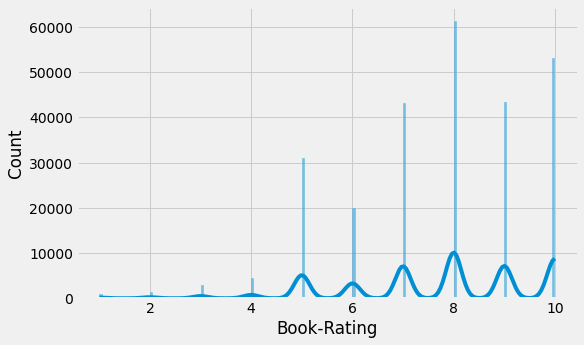

In [ ]:
#before log'
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))

Number of unique user/item interactions: 261899


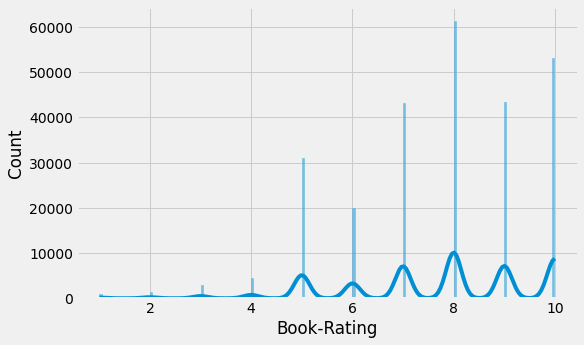

In [ ]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 209519
# interactions on Test set: 52380


In [ ]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
52973,0345443284,113519,3.17
11157,0061050806,135228,3.46
4726,006039384X,234828,2.32
36633,0312966091,128119,3.17
232005,1551669587,79266,2.81


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047973,000104799X,0001048082,0001053744,0001055607,0001056107,0001374362,0001374869,0001714600,0001821326,0001845039,0001935968,0001941941,0001941968,0001944711,0001945203,0001952803,0001953877,0001981307,0002000547,0002005018,0002005050,0002005557,0002006588,0002111314,0002115328,0002116286,0002153572,0002158973,0002165368,0002166828,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002191792,...,9997409728,9997412044,9997412958,9997507002,999750805X,9997508769,9997512952,9997519086,9997555635,9999980538,B00001U0CP,B0000523SY,B00005B4LM,B00005N5J6,B00005U7YK,B00005UMI4,B00005UMK6,B0000633PU,B000063VMD,B00006RGIO,B00007MF56,B00008RWPV,B000092Q0A,B00009EF82,B00009MBYK,B00009NDAN,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000DAPP1,B0000T6KHI,B0000VZEH8,B0000X8HIE,B00011SOXI,B00013AX9E,B0001FZGPI,B0001FZGRQ,B0001GMSV2,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
242,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
243,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
254,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
388,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
392,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[242, 243, 254, 388, 392, 446, 503, 505, 507, 638]

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:

# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(6589, 103441)

In [ ]:
U.shape

(6589, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 103441)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-7.50502336e-05, -1.05054301e-04, -1.24310194e-04, ...,
         2.92750196e-05,  1.36220008e-05,  1.84472500e-04],
       [-1.99452035e-03,  4.67862773e-03,  5.53619522e-03, ...,
         8.12937880e-04,  3.42781054e-04,  2.93968417e-03],
       [-2.75594532e-03,  1.13146378e-03,  1.33885505e-03, ...,
         1.28253201e-03,  2.85413711e-04,  6.70389436e-03],
       ...,
       [-3.01513677e-03,  1.73262656e-04,  2.05020776e-04, ...,
         8.28022420e-04,  3.54192345e-04,  2.06239382e-03],
       [-9.38474980e-04, -9.17328571e-04, -1.08547000e-03, ...,
         3.43230334e-04,  1.00508066e-04,  1.25442763e-03],
       [ 3.80823607e-03, -1.46228129e-04, -1.73030965e-04, ...,
         4.36965353e-05,  8.52717879e-06,  2.88521480e-04]])

In [ ]:
all_user_predicted_ratings.shape

(6589, 103441)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,242,243,254,388,392,446,503,505,507,638,643,651,709,735,741,753,805,850,882,900,901,929,1025,1075,1129,1131,1155,1211,1248,1424,1435,1548,1585,1674,1733,1848,1903,2010,2012,2024,...,276866,276925,276929,276939,276964,276984,276994,277157,277195,277203,277378,277427,277478,277523,277629,277639,277710,277711,277744,277901,277928,277929,277945,277965,278026,278137,278188,278194,278202,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000913154,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.00,0.03,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
000104687X,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,...,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
0001047973,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,...,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
000104799X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0001048082,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,...,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.00


Colaborative Filtering Recommender Class

In [ ]:
import random

In [ ]:

class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME

        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

# Evaluation

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))
      # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 11944, 23902, 28204, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 10067, 266866, 10067, 10067, 52853, 201017, 56399, 229329, 110746, 110746, 11676, 110029, 69078, 63714, 208410, 184401, 101606, 11676, 116866, 219008, 263325, 36907, 85526, 26583, 101731, 106988, 120565, 101606, 123056, 219008, 11676, 261037, 193560, 262998, 23902, 27617, 28602, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 61147, 61147, 193560, 91449, 274111, 61147, 68760, 122881, 147166, 170184, 29070, 170184, 34087, 274301, 170184, 170184, 170184, 147166, 120178, 120565, 30511, 189334, 14449, 140555, 189334, 196047, 275970, 165669, 166596, 23902, 14449, 72214, 62862, 6242, 14449, 25804, 101606, 101851, 11676, 179744, 95010, 11676, 14456, 37712, 123883, 141157, 274004, 68886, 145861, 94853, 23902, 76019, 23902, 272225, 11676, 36326, 72214, 189334, 174700, 84146, 161936, 27647, 11676, 11676, 100782, 142745, 241204, 149908, 79556, 170073, 30511, 259378, 94853, 225087, 20

In [ ]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(cf_recommender_model,user)


Enter User ID from above list for book recommendation:  23902
Recommendation for User-ID =  23902
         ISBN                   Book-Title  recStrength
0  0446310786        To Kill a Mockingbird         0.28
1  0156027321                   Life of Pi         0.21
2  0552998486                     Chocolat         0.20
3  0380002930               Watership Down         0.19
4  0060929871              Brave New World         0.16
5  0452282152    Girl with a Pearl Earring         0.16
6  1573225517                High Fidelity         0.16
7  0060958022  Five Quarters of the Orange         0.15
8  0684865742                Tis: A Memoir         0.15
9  0451166892     The Pillars of the Earth         0.14
